# Lale and its Impact on the Data Science Workflow

Guillaume Baudart, Martin Hirzel, Kiran Kate, Pari Ram, and Avi Shinnar

27 March 2020

Examples, documentation, code: https://github.com/ibm/lale

<img src="https://raw.githubusercontent.com/IBM/lale/d8ecf5c46e46653eb65a9eecc14dc991372cc162/docs/img/lale_logo.jpg" alt="logo" width="140px" align="left"/>

## Value Proposition

- **target user**: data scientist familiar with Python and scikit-learn
- **scope**: data preparation and machine learning (including some DL)
- **value**: consistent API for both manual machine learning and auto-ML

<img src="https://raw.githubusercontent.com/IBM/lale/d8ecf5c46e46653eb65a9eecc14dc991372cc162/examples/img/2019-1105-three-values.png" style="width:350px" align="left">

In [1]:
# !pip install --quiet lale

In [2]:
#Enabling schema validation for this notebook
from lale.settings import set_disable_data_schema_validation
set_disable_data_schema_validation(False)

## Example Dataset

In [3]:
import lale.datasets
(train_X_all, train_y_all), (test_X, test_y) = lale.datasets.covtype_df(test_size=0.1)
print(f'shape train_X_all {train_X_all.shape}, test_X {test_X.shape}')

shape train_X_all (522910, 54), test_X (58102, 54)


In [4]:
import sklearn.model_selection
train_X, other_X, train_y, other_y = sklearn.model_selection.train_test_split(
    train_X_all, train_y_all, test_size=0.9)
print(f'shape train_X {train_X.shape}, other_X {other_X.shape}')

shape train_X (52291, 54), other_X (470619, 54)


In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.concat([pd.DataFrame({'y': train_y}, index=train_X.index),
           train_X], axis=1).tail(10)

,y,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
484665,3,2277.0,41.0,31.0,228.0,145.0,1045.0,207.0,157.0,65.0,1516.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451137,1,3273.0,296.0,22.0,371.0,45.0,1740.0,153.0,227.0,212.0,808.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239309,1,3062.0,298.0,13.0,408.0,78.0,2445.0,184.0,235.0,191.0,1041.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
406901,2,3195.0,42.0,19.0,376.0,72.0,3873.0,220.0,196.0,105.0,2935.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
379632,2,3003.0,310.0,14.0,182.0,30.0,2573.0,181.0,230.0,189.0,2408.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
510084,1,2898.0,47.0,10.0,30.0,-3.0,1865.0,224.0,219.0,129.0,1022.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96001,2,2221.0,338.0,22.0,242.0,72.0,437.0,168.0,204.0,172.0,342.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39684,1,3289.0,322.0,18.0,285.0,60.0,4012.0,172.0,219.0,186.0,1291.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
227535,2,2890.0,272.0,6.0,376.0,43.0,2296.0,204.0,242.0,176.0,2460.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85578,1,3340.0,204.0,16.0,510.0,134.0,1851.0,210.0,253.0,174.0,1426.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Manual Pipeline

In [6]:
from sklearn.decomposition import PCA
from xgboost import XGBClassifier as XGBoost
lale.wrap_imported_operators()

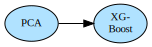

In [7]:
manual_trainable = PCA(n_components=6) >> XGBoost(n_estimators=3)
manual_trainable.visualize()

In [8]:
%%time
manual_trained = manual_trainable.fit(train_X, train_y)

CPU times: user 2.39 s, sys: 953 ms, total: 3.34 s
Wall time: 2.05 s


In [9]:
import sklearn.metrics
manual_y = manual_trained.predict(test_X)
print(f'accuracy {sklearn.metrics.accuracy_score(test_y, manual_y):.1%}')

accuracy 67.1%


## Hyperparameter Tuning

In [10]:
XGBoost.hyperparam_schema('n_estimators')

{'description': 'Number of trees to fit.',
 'type': 'integer',
 'default': 100,
 'minimumForOptimizer': 50,
 'maximumForOptimizer': 1000}

In [11]:
print(PCA.documentation_url())

https://lale.readthedocs.io/en/latest/modules/lale.lib.sklearn.pca.html


In [12]:
from lale.lib.lale import Hyperopt
import lale.schemas as schemas

CustomPCA = PCA.customize_schema(n_components=schemas.Int(min=2, max=54))
CustomXGBoost = XGBoost.customize_schema(n_estimators=schemas.Int(min=1, max=10))

hpo_planned = CustomPCA >> CustomXGBoost
hpo_trainable = Hyperopt(estimator=hpo_planned, max_evals=10, cv=3)

In [13]:
%%time
hpo_trained = hpo_trainable.fit(train_X, train_y)

100%|███████| 10/10 [02:15<00:00, 13.53s/trial, best loss: -0.7727907776451675]
CPU times: user 2min 53s, sys: 19.3 s, total: 3min 13s
Wall time: 2min 30s


### --- Excursions: Types as Search Spaces ---

<img src="https://raw.githubusercontent.com/IBM/lale/d8ecf5c46e46653eb65a9eecc14dc991372cc162/examples/img/2019-1208-loops.png" style="width:700px" align="left">

In [14]:
hpo_y = hpo_trained.predict(test_X)
print(f'accuracy {sklearn.metrics.accuracy_score(test_y, hpo_y):.1%}')

accuracy 77.7%


## Inspecting Automation Results

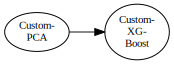

In [15]:
hpo_trained.get_pipeline().visualize()

In [16]:
hpo_trained.get_pipeline().pretty_print(ipython_display=True, customize_schema=True)

```python
from sklearn.decomposition import PCA as CustomPCA
from xgboost import XGBClassifier as CustomXGBoost
import lale

lale.wrap_imported_operators()
custom_pca = CustomPCA.customize_schema(
    n_components={"type": "integer", "minimum": 2, "maximum": 54}
)(n_components=43, svd_solver="full", whiten=True)
custom_xg_boost = CustomXGBoost.customize_schema(
    n_estimators={"type": "integer", "minimum": 1, "maximum": 10}
)(
    gamma=0.42208258595069725,
    learning_rate=0.6558019595096513,
    max_depth=5,
    min_child_weight=13,
    n_estimators=9,
    reg_alpha=0.3590229319214039,
    reg_lambda=0.7978279409450941,
    subsample=0.6209085649172931,
)
pipeline = custom_pca >> custom_xg_boost
```

In [17]:
hpo_trained.summary()

,tid,loss,time,log_loss,status
name,,,,,
p0,0,-0.684229,2.293911,1.161776,ok
p1,1,-0.708057,3.347494,0.950058,ok
p2,2,-0.631983,3.356443,1.123108,ok
p3,3,-0.699050,2.606100,1.168528,ok
p4,4,-0.717428,5.158346,0.690650,ok
p5,5,-0.759653,7.138689,0.655658,ok
p6,6,-0.707598,3.555126,0.942210,ok
p7,7,-0.772791,10.981915,0.555780,ok
p8,8,-0.653057,2.016587,0.845659,ok


In [18]:
worst_name = hpo_trained.summary().loss.argmax()
if not isinstance(worst_name, str): #newer pandas argmax returns index
    worst_name = hpo_trained.summary().index[worst_name]
print(worst_name)

p9


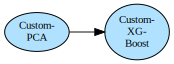

```python
custom_pca = CustomPCA.customize_schema(
    n_components={"type": "integer", "minimum": 2, "maximum": 54}
)(n_components=20, svd_solver="full", whiten=True)
custom_xg_boost = CustomXGBoost.customize_schema(
    n_estimators={"type": "integer", "minimum": 1, "maximum": 10}
)(
    gamma=0.37068548766270437,
    learning_rate=0.02005982973762002,
    max_depth=2,
    min_child_weight=9,
    n_estimators=5,
    reg_alpha=0.8716519284632148,
    reg_lambda=0.7305593001592293,
    subsample=0.9559232064468288,
)
pipeline = custom_pca >> custom_xg_boost
```

In [19]:
hpo_trained.get_pipeline(worst_name).visualize()
hpo_trained.get_pipeline(worst_name).pretty_print(
    ipython_display=True, show_imports=False, customize_schema=True)

## Combined Algorithm Selection and Hyperparameter Tuning

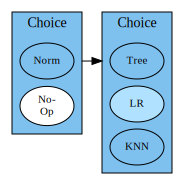

In [20]:
from sklearn.preprocessing import Normalizer as Norm
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.neighbors import KNeighborsClassifier as KNN
from lale.lib.lale import NoOp
lale.wrap_imported_operators()

KNN = KNN.customize_schema(n_neighbors=schemas.Int(min=1, max=10))
transp_planned = (Norm | NoOp) >> (Tree | LR(solver='liblinear') | KNN)
transp_planned.visualize()

In [21]:
%%time
transp_trained = transp_planned.auto_configure(
    train_X, train_y, optimizer=Hyperopt, cv=3, max_evals=3)

100%|█████████| 3/3 [01:24<00:00, 28.25s/trial, best loss: -0.8390927596840342]
CPU times: user 1min 26s, sys: 953 ms, total: 1min 27s
Wall time: 1min 26s


### ---  Excursion: Bindings as Lifecycle ---

<img src="https://raw.githubusercontent.com/IBM/lale/d8ecf5c46e46653eb65a9eecc14dc991372cc162/examples/img/2019-1105-bindings.png" style="width:450px" align="left">

```python
knn = KNN.customize_schema(
    n_neighbors={"type": "integer", "minimum": 1, "maximum": 10}
)(algorithm="ball_tree", metric="manhattan", n_neighbors=9)
pipeline = NoOp() >> knn
```

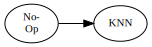

In [22]:
transp_trained.pretty_print(
    ipython_display=True, show_imports=False, customize_schema=True)
transp_trained.visualize()

In [23]:
%%time
transp_y = transp_trained.predict(test_X)
print(f'accuracy {sklearn.metrics.accuracy_score(test_y, transp_y):.1%}')

accuracy 86.6%
CPU times: user 51.5 s, sys: 31.2 ms, total: 51.5 s
Wall time: 52 s


## Non-Linear Pipeline

In [24]:
test_X.json_schema

{'description': 'Features of forest covertypes dataset (classification).',
 'documentation_url': 'https://scikit-learn.org/0.20/datasets/index.html#forest-covertypes',
 'type': 'array',
 'items': {'type': 'array',
  'minItems': 54,
  'maxItems': 54,
  'items': [{'description': 'Elevation', 'type': 'integer'},
   {'description': 'Aspect', 'type': 'integer'},
   {'description': 'Slope', 'type': 'integer'},
   {'description': 'Horizontal_Distance_To_Hydrology', 'type': 'integer'},
   {'description': 'Vertical_Distance_To_Hydrology', 'type': 'integer'},
   {'description': 'Horizontal_Distance_To_Roadways', 'type': 'integer'},
   {'description': 'Hillshade_9am', 'type': 'integer'},
   {'description': 'Hillshade_Noon', 'type': 'integer'},
   {'description': 'Hillshade_3pm', 'type': 'integer'},
   {'description': 'Horizontal_Distance_To_Fire_Points', 'type': 'integer'},
   {'description': 'Wilderness_Area1', 'enum': [0, 1]},
   {'description': 'Wilderness_Area2', 'enum': [0, 1]},
   {'descrip

In [25]:
from lale.lib.lale import categorical
print(categorical(max_values=2)(test_X))

['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']


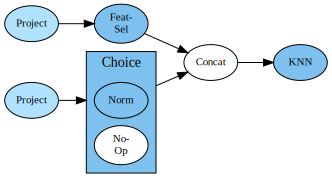

In [26]:
from lale.lib.lale import Project
from lale.lib.lale import ConcatFeatures as Concat
from sklearn.feature_selection import SelectKBest as FeatSel
lale.wrap_imported_operators()

binary_prep = Project(columns=categorical(max_values=2)) >> FeatSel
other_prep = Project(drop_columns=categorical(max_values=2)) >> (Norm | NoOp)
nonlin_planned = (binary_prep & other_prep) >> Concat >> KNN
nonlin_planned.visualize()

In [27]:
%%time
nonlin_trained = nonlin_planned.auto_configure(
    train_X, train_y, optimizer=Hyperopt, cv=3, max_evals=3, verbose=True)

100%|█████████| 3/3 [02:17<00:00, 45.88s/trial, best loss: -0.8620412868709595]
CPU times: user 2min 18s, sys: 359 ms, total: 2min 19s
Wall time: 2min 21s


### --- Excursion: Combinators ---

| Lale feature            | Name | Description  | Scikit-learn feature                |
| ----------------------- | ---- | ------------ | ----------------------------------- |
| >> or `make_pipeline`   | pipe | feed to next | `make_pipeline`                     |
| & or `make_union`       | and  | run both     | `make_union` or `ColumnTransformer` |
| &#x7c; or `make_choice` | or   | choose one   | N/A (specific to given AutoML tool) |

### --- Excursion: Interoperability ---

<img src="https://raw.githubusercontent.com/IBM/lale/d8ecf5c46e46653eb65a9eecc14dc991372cc162/examples/img/2019-1105-interop.png" style="width:550px" align="left">

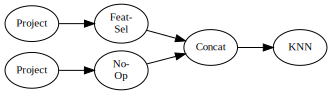

```python
project_0 = Project(columns=lale.lib.lale.categorical(max_values=2))
feat_sel = FeatSel(k=8)
pipeline_0 = make_pipeline(project_0, feat_sel)
project_1 = Project(drop_columns=lale.lib.lale.categorical(max_values=2))
pipeline_1 = make_pipeline(project_1, NoOp())
union = make_union(pipeline_0, pipeline_1)
knn = KNN(algorithm="kd_tree", n_neighbors=7, weights="distance")
pipeline = make_pipeline(union, knn)
```

In [28]:
nonlin_trained.visualize()
nonlin_trained.pretty_print(ipython_display=True, show_imports=False, combinators=False)

In [29]:
%%time
nonlin_y = nonlin_trained.predict(test_X)
print(f'accuracy {sklearn.metrics.accuracy_score(test_y, nonlin_y):.1%}')

accuracy 88.6%
CPU times: user 4.31 s, sys: 46.9 ms, total: 4.36 s
Wall time: 4.44 s


In [30]:
binary_prep_trainable = Project(columns=categorical(max_values=2)) >> FeatSel(k=8)
binary_prep_trained = binary_prep_trainable.fit(train_X, train_y)
binary_prep_trained.transform(test_X.head(10))

,Wilderness_Area1,Wilderness_Area4,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type10,Soil_Type38,Soil_Type39
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Summary

- code and documentation: https://github.com/ibm/lale
- more examples: https://nbviewer.jupyter.org/github/IBM/lale/tree/master/examples/
- frequently asked questions: https://github.com/IBM/lale/blob/master/docs/faq.rst
- arXiv paper: https://arxiv.org/pdf/1906.03957.pdf

<img src="https://raw.githubusercontent.com/IBM/lale/d8ecf5c46e46653eb65a9eecc14dc991372cc162/examples/img/2019-1105-summary.png" style="width:350px" align="left">